# Machine Learning Basics
In this module, you'll be implementing a simple Linear Regressor and Logistic Regressor. You will be using the Salary Data for the tasks in this module. <br> <br>
**Pipeline:**
* Acquiring the data - done
* Handling files and formats - done
* Data Analysis - done
* Prediction
* Analysing results

## Imports
You may require NumPy, pandas, matplotlib and scikit-learn for this module. Do not, however, use the inbuilt Linear and Logistic Regressors from scikit-learn.

In [5]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


## Dataset
You can load the dataset and perform any dataset related operations here. Split the data into training and testing sets. Do this separately for the regression and classification problems.

In [133]:
df = pd.read_csv("Data/SalaryData.csv")

y = df.Salary
x = df.YearsExperience
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


## Task 1a - Linear Regressor
Code your own Linear Regressor here, and fit it to your training data. You will be predicting salary based on years of experience.

In [134]:
def compute_yi(param,x_t):
    x = [ list([1,x]) for x in x_t]
    x = np.array(x)
    
    return(np.dot(x,param))

In [135]:
def compute_diff(param):
    h_x = compute_yi(param, x_train)
   
    c = sum(h_x - y_train)
    m = sum( np.multiply(h_x - y_train,x_train) )
    
    return(np.array([c,m]))

In [136]:
def compute_param():
    param = np.array([0.0,0.0])
    a = 0.01/len(x_train)
    
    for i in range(1000):
        param -= (a*compute_diff(param))
    
    return(param)

In [137]:
param = compute_param()

c = param[0]
m = param[1]  #y = mx + c
print("m=", m)
print("c=", c)

y_pred=compute_yi(param,x_test)

m= 9761.07183294972
c= 23772.327849561174


Text(0, 0.5, 'Salary')

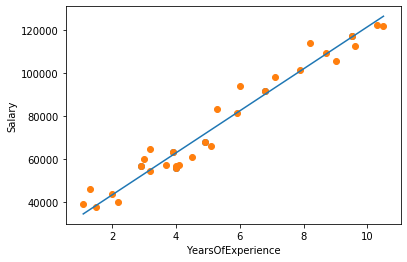

In [140]:
plt.scatter(x_test,y_test)
plt.scatter(x,y)
plt.plot(x,(m*x)+c)
plt.xlabel("YearsOfExperience")
plt.ylabel("Salary")

In [139]:
import math
#R2 error

residue_ss = sum((y_test-y_pred)**2)
y_mean = sum(x)/len(x)
tot_ss = sum((y_mean-y_pred)**2)

r2 = 1-(residue_ss/tot_ss)
print("r2=", r2)

#RMSE

rmse = math.sqrt((residue_ss/len(x)))
print("rmse=", rmse)

#mae

mae=math.sqrt(residue_ss)/len(x)
print("mae=", mae)

r2= 0.9976356217212986
rmse= 1714.6461935483937
mae= 313.0501327822748


## Task 1b - Logistic Regression
Code your own Logistic Regressor here, and fit it to your training data. You will first have to create a column, 'Salary<60000', which contains '1' if salary is less than 60000 and '0' otherwise. This is your target variable, which you will aim to predict based on years of experience.

In [29]:
df = pd.read_csv("Data/SalaryData.csv")

y = [1 if i<60000 else 0 for i in df.Salary]
x = df.YearsExperience

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

def sigmoid(x):
    return (1/(1 + math.exp(-x)))

def compute_diff(param):
    h_x = compute_yi(param, x_train)
   
    c = sum(h_x - y_train)
    m = sum( np.multiply(h_x - y_train,x_train) )
    
    return(np.array([c,m]))

def compute_param():
    param = np.array([0.0,0.0])
    a = 0.01/len(x_train)
    
    for i in range(1000):
        param -= (a*compute_diff(param))
    
    return(param)

def decision(x):
    return([0 if i < 0.5 else 1 for i in x ])

param = compute_param()

c = param[0]
m = param[1]  #y = mx + c

print("m=", m)
print("c=", c)

y_pred=compute_yi(param,x)

print(decision(y_pred))
print(y)


1/(1+np.exp(-(m*x.values+c)))

plt.scatter(x_test,decision(y_test))
plt.scatter(x,decision(y))
plt.plot(x.values,(1/(1+np.exp(-(m*x.values+c)))))

## Task 2 - Results
Analyse the quality of the ML models you built using metrics such as R2, MAE and RMSE for the Linear Regressor, and Accuracy for the Logistic Regressor. Evaluate their performance on the testing set.

In [87]:
y_GT = decision(y_pred)
true_vals=0
for i in range(len(y_pred)):
    if(y[i]==y_GT[i]):
        true_vals+=1
accuracy = (true_vals/len(y))*100

print(accuracy)

80.0
